# Proyecto 1 – Relación Minutos Ingreso

## Nombres de los integrantes del grupo
    *"Yeison Andres Baron Lopez"

In [16]:
## Carga de datos


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#importar los datos desdel el csv
df = pd.read_csv('E:/OneDrive - Banco Agrario de Colombia S.A/Escritorio/Python/EAN/Machine learning/Guia_1/Credito_dias/Datos/Credito_dias.csv')

# Mostrar las primeras filas
display(df.head())

# Información general del DataFrame
display(df.info())

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


None

In [17]:
#volver entero la variable "Total minutos  utilizados por el lciente"
df=df['totmou'].astype(int)

# Descripción de las variables

totrev:Tiene 10,000 valores no nulos.
El tipo de dato es float64 (números decimales).

creditcd:Tiene 10,000 valores no nulos.
El tipo de dato es float64 (números decimales).

eqpdays:Tiene 9,848 valores no nulos, lo que significa que hay algunos valores faltantes.
El tipo de dato es object, que en pandas normalmente indica que los datos pueden ser texto o una mezcla de tipos de datos.

Customer_ID:Tiene 10,000 valores no nulos.
El tipo de dato es int64 (números enteros), probablemente un identificador único para cada cliente.

## Variables
totrev: Ingresos del cliente.

totmou: Total de minutos usados por el cliente.

creditcd: Indicador de tarjeta de crédito.

eqpdays: Número de días (antigüedad) del equipo actual.

Customer_ID: ID único del cliente.

En el siguiente codigo imputare de manera sencilla los datos faltantes de la variable creditcd con "Y"

In [12]:
df['creditcd'].fillna("Y",inplace=True)

In [13]:
print(df.columns)

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'Customer_ID'], dtype='object')


In [9]:
display(df.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

#El dataframe no tiene datos faltantes

En el siuginete codigo creare:
- Diagrama de barras de creditcd (Indicador de tarjeta de crédito)
- Histograma de eqpdays (Antigüedad del equipo)
- Diagrama de dispersión para explorar la relación entre 'totmou' y 'totrev'
- Calcular la correlación entre 'totmou' y 'totrev'


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


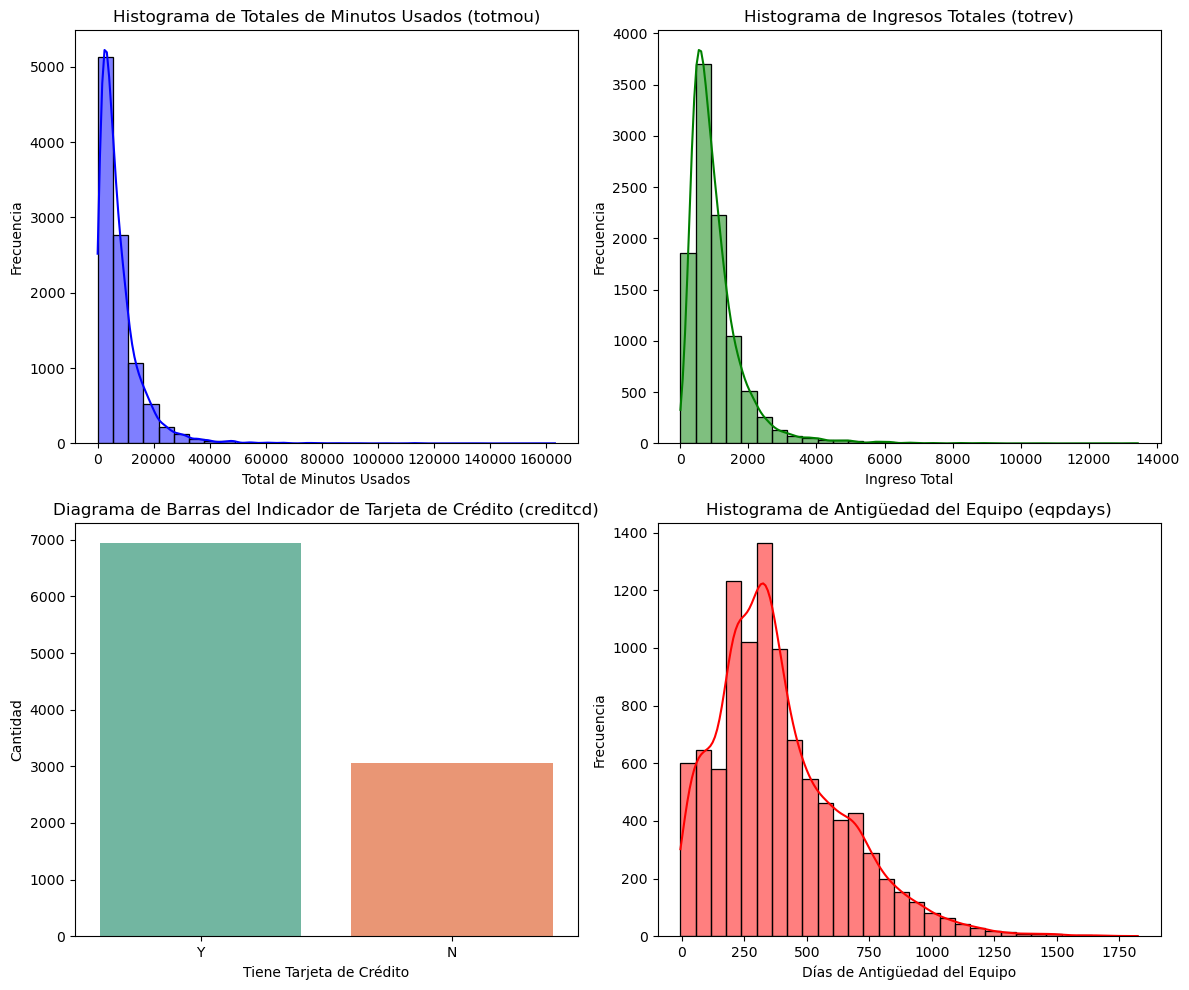

In [15]:
# Crear una figura para los histogramas y diagrama de barras
plt.figure(figsize=(12, 10))

# Histograma de totmou (Total de minutos usados)
plt.subplot(2, 2, 1)
sns.histplot(df['totmou'], bins=30, kde=True, color='blue')
plt.title('Histograma de Totales de Minutos Usados (totmou)')
plt.xlabel('Total de Minutos Usados')
plt.ylabel('Frecuencia')

# Histograma de totrev (Ingresos)
plt.subplot(2, 2, 2)
sns.histplot(df['totrev'], bins=30, kde=True, color='green')
plt.title('Histograma de Ingresos Totales (totrev)')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')

# Diagrama de barras de creditcd (Indicador de tarjeta de crédito)
plt.subplot(2, 2, 3)
sns.countplot(x='creditcd', data=df, palette='Set2')
plt.title('Diagrama de Barras del Indicador de Tarjeta de Crédito (creditcd)')
plt.xlabel('Tiene Tarjeta de Crédito')
plt.ylabel('Cantidad')

# Histograma de eqpdays (Antigüedad del equipo)
plt.subplot(2, 2, 4)
sns.histplot(df['eqpdays'], bins=30, kde=True, color='red')
plt.title('Histograma de Antigüedad del Equipo (eqpdays)')
plt.xlabel('Días de Antigüedad del Equipo')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Correlación entre Total de Minutos y Ingreso Total:
          totmou    totrev
totmou  1.000000  0.835485
totrev  0.835485  1.000000


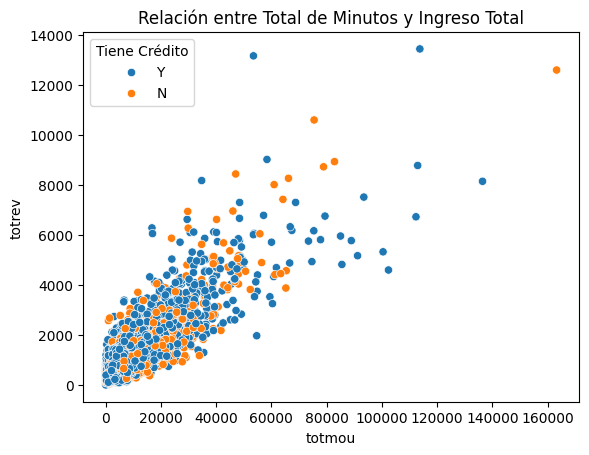

In [11]:
# Análisis de correlación
correlation = df[['totmou', 'totrev']].corr()
print("Correlación entre Total de Minutos y Ingreso Total:")
print(correlation)

# Impacto del crédito
sns.scatterplot(data=df, x='totmou', y='totrev', hue='creditcd')
plt.title('Relación entre Total de Minutos y Ingreso Total')
plt.xlabel('totmou')
plt.ylabel('totrev')
plt.legend(title='Tiene Crédito')
plt.show()